# Задание 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

logins = pd.read_csv('logins.csv')
logins = logins.reindex(columns=['reg_date','event_date','user_id','platform','country','lvl'])
logins['reg_date'] = pd.to_datetime(logins['reg_date'])
logins['event_date'] = pd.to_datetime(logins['event_date'])
payments = pd.read_csv('payments.csv')
payments = payments.reindex(columns=['user_id','revenue','event_date'])

In [3]:
logins

,reg_date,event_date,user_id,platform,country,lvl
0,2021-05-31,2021-08-02,10,iOS,JP,1120
1,2021-08-01,2021-08-02,20,Android,PE,30
2,2020-07-10,2021-08-02,30,Android,VN,1400
3,2021-08-01,2021-08-02,40,Android,ID,100
4,2020-03-27,2021-08-02,50,Android,IN,2290
...,...,...,...,...,...,...
2647127,2021-07-04,2021-08-14,41830,Android,CN,1970
2647128,2021-08-14,2021-08-14,2041490,Android,CN,10
2647129,2021-08-03,2021-08-14,351810,iOS,DE,250
2647130,2021-08-14,2021-08-14,2041590,Huawei,RU,10


In [4]:
payments

,user_id,revenue,event_date
0,272430,5.99,2021-08-02
1,298300,2.99,2021-08-02
2,177880,2.99,2021-08-02
3,282950,2.99,2021-08-02
4,66630,4.99,2021-08-02
...,...,...,...
9138,430270,2.99,2021-08-14
9139,177190,4.99,2021-08-14
9140,139890,10.99,2021-08-14
9141,2035690,4.99,2021-08-14


# ARPU, ARPPU, Paying conversion
    Для расчета ARPU и ARPPU и конверсии в первую покупку нам необходимо знать общее количество пользователей, количество платящих и прибыль

In [5]:
unique_users = logins['user_id'].nunique()
paying_users = payments['user_id'].nunique()
total_revenue = payments['revenue'].sum()

    Далее вычисляем значения

In [6]:
arpu = total_revenue / unique_users
arpu

0.1831590574013392

In [7]:
arppu = total_revenue / paying_users
arppu

4.338001160092809

In [31]:
paying_user_rate = paying_users / unique_users * 100
paying_user_rate

4.222199364221024

In [32]:
payments_by_users = payments.groupby('user_id')['revenue'].sum()

In [33]:
logins_with_payments = logins.join(payments_by_users,on='user_id')

In [34]:
platform_revenue = logins_with_payments.groupby('platform')['revenue'].sum().reset_index()
platform_revenue

,platform,revenue
0,Amazon,650.83
1,Android,942992.90
2,Huawei,43438.29
3,Samsung,4831.09
4,iOS,280817.34


In [35]:
platform_users = logins_with_payments.groupby('platform')['user_id'].agg('nunique').to_frame()
platform_users

,user_id
platform,
Amazon,271
Android,161419
Huawei,4263
Samsung,1140
iOS,37120


In [37]:
platform = platform_revenue.join(platform_users,on='platform')
platform = platform.rename(columns={"user_id":"users"})
platform

,platform,revenue,users
0,Amazon,650.83,271
1,Android,942992.90,161419
2,Huawei,43438.29,4263
3,Samsung,4831.09,1140
4,iOS,280817.34,37120


In [38]:
platform['average check'] = platform['revenue'] / platform['users']
platform

,platform,revenue,users,average check
0,Amazon,650.83,271,2.401587
1,Android,942992.90,161419,5.841895
2,Huawei,43438.29,4263,10.189606
3,Samsung,4831.09,1140,4.237798
4,iOS,280817.34,37120,7.565122


<AxesSubplot:title={'center':'Android и iOS - самые прибыльные платформы'}, xlabel='platform'>

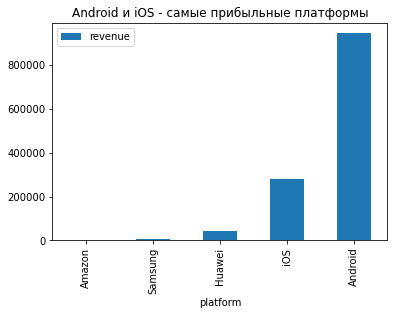

In [43]:
platform.sort_values(by='revenue').plot.bar(x='platform',y='revenue',title='Android и iOS - самые прибыльные платформы')

<AxesSubplot:title={'center':'Android и iOS имеют высокий средний чек'}, xlabel='platform'>

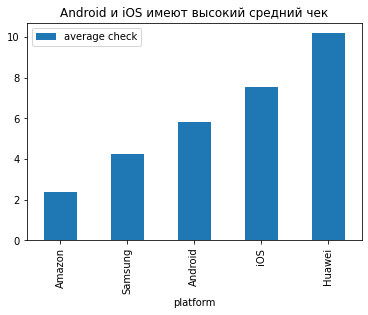

In [40]:
platform.sort_values(by='average check').plot.bar(x='platform',y='average check',title='Android и iOS имеют высокий средний чек')

   #### Выводы:
    ARPU - 0.18, ARPPU - 4.34, Paying Conversion (Paying Users) - 4.22%
    Android и iOS - самые прибыльные платформы, и даже при большом количестве пользователей средний чек имеет достаточно высокий показатель

# Retention rate  

    Я разделил Retention rate на 3 категории: 
    - Retention Rate New Users (сюда входят пользователи, которые зарегестрировались ПОСЛЕ выхода игры)
    - Retention Rate Old Users (сюда входят пользователи, которые зарегестрировали ДО выхода игры)
    - Retention Rate All Users (сюда входят все пользователи)

### Rentetion Rate New Users:

In [9]:
new_users_logins = logins.loc[logins['reg_date'] >= pd.to_datetime('2021-08-01')].sort_values(by='reg_date')
new_users_logins

,reg_date,event_date,user_id,platform,country,lvl
1,2021-08-01,2021-08-02,20,Android,PE,30
995347,2021-08-01,2021-08-07,219170,Huawei,RU,170
2051857,2021-08-01,2021-08-11,317940,iOS,VN,230
1483506,2021-08-01,2021-08-05,163150,Android,CN,150
2052111,2021-08-01,2021-08-11,82660,iOS,TH,320
...,...,...,...,...,...,...
2595859,2021-08-14,2021-08-14,2020070,Android,JP,10
2595855,2021-08-14,2021-08-14,1990160,Android,US,10
2553639,2021-08-14,2021-08-14,1976640,Android,RU,45
2595821,2021-08-14,2021-08-14,1990870,Android,CN,10


In [10]:
new_users_logins['cohort_index'] = (new_users_logins['event_date'] - new_users_logins['reg_date']).dt.days
new_users_cohort_data = new_users_logins.groupby(['reg_date','cohort_index'])['user_id'].agg('nunique').reset_index()
new_users_cohort_data

,reg_date,cohort_index,user_id
0,2021-08-01,0,7324
1,2021-08-01,1,2429
2,2021-08-01,2,1526
3,2021-08-01,3,1184
4,2021-08-01,4,919
...,...,...,...
100,2021-08-12,1,1942
101,2021-08-12,2,1204
102,2021-08-13,0,5698
103,2021-08-13,1,2068


In [11]:
new_users_retention_count = new_users_cohort_data.pivot_table(index='reg_date',columns='cohort_index',values='user_id')
new_users_retention_count

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
reg_date,,,,,,,,,,,,,,
2021-08-01,7324.0,2429.0,1526.0,1184.0,919.0,733.0,691.0,640.0,518.0,496.0,462.0,396.0,387.0,394.0
2021-08-02,6886.0,2365.0,1430.0,1013.0,865.0,683.0,604.0,482.0,448.0,402.0,385.0,352.0,327.0,NaN
2021-08-03,7224.0,2393.0,1417.0,1029.0,813.0,727.0,623.0,551.0,508.0,452.0,427.0,421.0,NaN,NaN
2021-08-04,8160.0,2759.0,1691.0,1199.0,1045.0,811.0,724.0,637.0,540.0,473.0,451.0,NaN,NaN,NaN
2021-08-05,7542.0,2600.0,1558.0,1136.0,954.0,774.0,698.0,587.0,530.0,457.0,NaN,NaN,NaN,NaN
2021-08-06,6713.0,2330.0,1388.0,1023.0,825.0,701.0,591.0,534.0,482.0,NaN,NaN,NaN,NaN,NaN
2021-08-07,6550.0,2337.0,1427.0,1075.0,835.0,720.0,621.0,552.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-08,6347.0,2138.0,1386.0,1002.0,795.0,657.0,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-09,5933.0,2147.0,1350.0,953.0,749.0,660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
new_users_cohort_size = new_users_retention_count.iloc[:,0]
new_users_retention_rate = new_users_retention_count.div(new_users_cohort_size,axis=0)
new_users_retention_rate.index = new_users_retention_rate.index.strftime('%d-%m-%y')
new_users_retention_rate

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
reg_date,,,,,,,,,,,,,,
01-08-21,1.0,0.331649,0.208356,0.161660,0.125478,0.100082,0.094347,0.087384,0.070726,0.067723,0.063080,0.054069,0.052840,0.053796
02-08-21,1.0,0.343450,0.207668,0.147110,0.125617,0.099187,0.087714,0.069997,0.065060,0.058379,0.055911,0.051118,0.047488,NaN
03-08-21,1.0,0.331257,0.196152,0.142442,0.112542,0.100637,0.086240,0.076274,0.070321,0.062569,0.059109,0.058278,NaN,NaN
04-08-21,1.0,0.338113,0.207230,0.146936,0.128064,0.099387,0.088725,0.078064,0.066176,0.057966,0.055270,NaN,NaN,NaN
05-08-21,1.0,0.344736,0.206577,0.150623,0.126492,0.102625,0.092548,0.077831,0.070273,0.060594,NaN,NaN,NaN,NaN
06-08-21,1.0,0.347088,0.206763,0.152391,0.122896,0.104424,0.088038,0.079547,0.071801,NaN,NaN,NaN,NaN,NaN
07-08-21,1.0,0.356794,0.217863,0.164122,0.127481,0.109924,0.094809,0.084275,NaN,NaN,NaN,NaN,NaN,NaN
08-08-21,1.0,0.336852,0.218371,0.157870,0.125256,0.103513,0.094690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-08-21,1.0,0.361874,0.227541,0.160627,0.126243,0.111242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Теперь вычислим Retention Rate Old Users

In [14]:
old_logins = logins.loc[logins['reg_date'] < pd.to_datetime('2021-08-01')]
old_logins

,reg_date,event_date,user_id,platform,country,lvl
0,2021-05-31,2021-08-02,10,iOS,JP,1120
2,2020-07-10,2021-08-02,30,Android,VN,1400
4,2020-03-27,2021-08-02,50,Android,IN,2290
5,2020-09-06,2021-08-02,60,Android,US,40
6,2020-06-26,2021-08-02,70,iOS,CN,90
...,...,...,...,...,...,...
2647121,2018-11-23,2021-08-14,2022220,iOS,US,400
2647122,2021-02-25,2021-08-14,194570,iOS,AU,1450
2647125,2021-07-06,2021-08-14,280470,Android,HK,580
2647126,2020-04-28,2021-08-14,245760,Android,ID,2271


    Необходимо найти день первого запуска игры у "старого" пользователя. Для этого производим следующие действия:

In [15]:
start_date = old_logins.groupby('user_id')['event_date'].agg('min')
start_date = start_date.to_frame().rename(columns={"event_date" : "start_date"})
start_date

,start_date
user_id,
10,2021-08-01
30,2021-08-02
50,2021-08-01
60,2021-08-02
70,2021-08-01
...,...
2041480,2021-08-14
2041530,2021-08-14
2041550,2021-08-14


    Чтобы взаимодействовать с данными start_date, нужно их соединить с old_logins.

In [16]:
old_logins = old_logins.join(start_date,on='user_id').sort_values(by='reg_date')
old_logins

,reg_date,event_date,user_id,platform,country,lvl,start_date
2298832,2017-07-19,2021-08-13,1510210,Android,CA,960,2021-08-07
2016715,2017-07-19,2021-08-09,1510210,Android,CA,960,2021-08-07
1821378,2017-07-19,2021-08-08,1510210,Android,CA,930,2021-08-07
829993,2017-07-19,2021-08-03,258230,iOS,CA,600,2021-08-01
125512,2017-07-19,2021-08-01,258230,iOS,CA,600,2021-08-01
...,...,...,...,...,...,...,...
1219152,2021-07-31,2021-08-04,199140,Android,RU,95,2021-08-01
318978,2021-07-31,2021-08-02,719970,Android,IT,90,2021-08-01
319004,2021-07-31,2021-08-02,719990,Android,BR,30,2021-08-02
1493877,2021-07-31,2021-08-07,233200,iOS,IT,160,2021-08-01


In [17]:
old_logins['n day retention'] = (old_logins['event_date'] - old_logins['start_date']).dt.days
old_logins

,reg_date,event_date,user_id,platform,country,lvl,start_date,n day retention
2298832,2017-07-19,2021-08-13,1510210,Android,CA,960,2021-08-07,6
2016715,2017-07-19,2021-08-09,1510210,Android,CA,960,2021-08-07,2
1821378,2017-07-19,2021-08-08,1510210,Android,CA,930,2021-08-07,1
829993,2017-07-19,2021-08-03,258230,iOS,CA,600,2021-08-01,2
125512,2017-07-19,2021-08-01,258230,iOS,CA,600,2021-08-01,0
...,...,...,...,...,...,...,...,...
1219152,2021-07-31,2021-08-04,199140,Android,RU,95,2021-08-01,3
318978,2021-07-31,2021-08-02,719970,Android,IT,90,2021-08-01,1
319004,2021-07-31,2021-08-02,719990,Android,BR,30,2021-08-02,0
1493877,2021-07-31,2021-08-07,233200,iOS,IT,160,2021-08-01,6


In [18]:
old_users_cohort_data = old_logins.groupby(['start_date','n day retention'])['user_id'].agg('nunique').reset_index()
old_users_cohort_data

,start_date,n day retention,user_id
0,2021-08-01,0,38540
1,2021-08-01,1,23426
2,2021-08-01,2,21075
3,2021-08-01,3,19976
4,2021-08-01,4,18819
...,...,...,...
100,2021-08-12,1,872
101,2021-08-12,2,597
102,2021-08-13,0,3644
103,2021-08-13,1,886


In [19]:
old_users_retention_count = old_users_cohort_data.pivot_table(index='start_date',columns='n day retention',values='user_id')
old_users_retention_count

n day retention,0,1,2,3,4,5,6,7,8,9,10,11,12,13
start_date,,,,,,,,,,,,,,
2021-08-01,38540.0,23426.0,21075.0,19976.0,18819.0,18251.0,17836.0,17422.0,16968.0,16182.0,15989.0,15447.0,14981.0,14712.0
2021-08-02,12223.0,4267.0,3649.0,3274.0,3129.0,2829.0,2706.0,2784.0,2628.0,2542.0,2430.0,2406.0,2149.0,NaN
2021-08-03,8420.0,2438.0,1881.0,1670.0,1500.0,1444.0,1333.0,1302.0,1272.0,1198.0,1122.0,1028.0,NaN,NaN
2021-08-04,7790.0,2024.0,1512.0,1337.0,1196.0,1134.0,1089.0,1062.0,966.0,879.0,845.0,NaN,NaN,NaN
2021-08-05,6166.0,1607.0,1239.0,999.0,894.0,786.0,733.0,715.0,672.0,629.0,NaN,NaN,NaN,NaN
2021-08-06,5605.0,1447.0,1067.0,867.0,753.0,697.0,633.0,615.0,580.0,NaN,NaN,NaN,NaN,NaN
2021-08-07,5397.0,1455.0,972.0,801.0,717.0,669.0,630.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-08,5172.0,1274.0,910.0,785.0,681.0,598.0,539.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-09,4198.0,1098.0,794.0,618.0,567.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
old_users_cohort_size = old_users_retention_count.iloc[:,0]
old_users_retention_rate = old_users_retention_count.div(old_users_cohort_size,axis=0)
old_users_retention_rate.index = old_users_retention_rate.index.strftime('%d-%m-%y')
old_users_retention_rate

n day retention,0,1,2,3,4,5,6,7,8,9,10,11,12,13
start_date,,,,,,,,,,,,,,
01-08-21,1.0,0.607836,0.546834,0.518319,0.488298,0.473560,0.462792,0.452050,0.440270,0.419875,0.414868,0.400804,0.388713,0.381733
02-08-21,1.0,0.349096,0.298536,0.267856,0.255993,0.231449,0.221386,0.227767,0.215004,0.207969,0.198806,0.196842,0.175816,NaN
03-08-21,1.0,0.289549,0.223397,0.198337,0.178147,0.171496,0.158314,0.154632,0.151069,0.142280,0.133254,0.122090,NaN,NaN
04-08-21,1.0,0.259820,0.194095,0.171630,0.153530,0.145571,0.139795,0.136329,0.124005,0.112837,0.108472,NaN,NaN,NaN
05-08-21,1.0,0.260623,0.200941,0.162018,0.144989,0.127473,0.118878,0.115958,0.108985,0.102011,NaN,NaN,NaN,NaN
06-08-21,1.0,0.258162,0.190366,0.154683,0.134344,0.124353,0.112935,0.109723,0.103479,NaN,NaN,NaN,NaN,NaN
07-08-21,1.0,0.269594,0.180100,0.148416,0.132852,0.123958,0.116732,0.111729,NaN,NaN,NaN,NaN,NaN,NaN
08-08-21,1.0,0.246326,0.175947,0.151779,0.131671,0.115623,0.104215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-08-21,1.0,0.261553,0.189138,0.147213,0.135064,0.121725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Retention Rate All Users:

In [22]:
start_date_all_users = logins.groupby('user_id')['event_date'].agg('min')
start_date_all_users = start_date_all_users.to_frame().rename(columns={"event_date" : "start_date"})
start_date_all_users

,start_date
user_id,
10,2021-08-01
20,2021-08-01
30,2021-08-02
40,2021-08-01
50,2021-08-01
...,...
2041550,2021-08-14
2041560,2021-08-14
2041570,2021-08-14


In [23]:
logins = logins.join(start_date_all_users,on='user_id').sort_values(by='reg_date')
logins

,reg_date,event_date,user_id,platform,country,lvl,start_date
2065088,2017-07-19,2021-08-09,258230,iOS,CA,620,2021-08-01
829481,2017-07-19,2021-08-03,258230,iOS,CA,600,2021-08-01
1990930,2017-07-19,2021-08-08,258230,iOS,CA,620,2021-08-01
54965,2017-07-19,2021-08-05,258230,iOS,CA,620,2021-08-01
54963,2017-07-19,2021-08-05,258230,iOS,CA,620,2021-08-01
...,...,...,...,...,...,...,...
2576438,2021-08-14,2021-08-14,2010850,Android,ID,10,2021-08-14
2576442,2021-08-14,2021-08-14,1935610,Android,IN,90,2021-08-14
2576449,2021-08-14,2021-08-14,1977330,Android,IR,10,2021-08-14
2576391,2021-08-14,2021-08-14,1977540,Android,VN,10,2021-08-14


In [24]:
logins['n day retention'] = (logins['event_date'] - logins['start_date']).dt.days
logins

,reg_date,event_date,user_id,platform,country,lvl,start_date,n day retention
2065088,2017-07-19,2021-08-09,258230,iOS,CA,620,2021-08-01,8
829481,2017-07-19,2021-08-03,258230,iOS,CA,600,2021-08-01,2
1990930,2017-07-19,2021-08-08,258230,iOS,CA,620,2021-08-01,7
54965,2017-07-19,2021-08-05,258230,iOS,CA,620,2021-08-01,4
54963,2017-07-19,2021-08-05,258230,iOS,CA,620,2021-08-01,4
...,...,...,...,...,...,...,...,...
2576438,2021-08-14,2021-08-14,2010850,Android,ID,10,2021-08-14,0
2576442,2021-08-14,2021-08-14,1935610,Android,IN,90,2021-08-14,0
2576449,2021-08-14,2021-08-14,1977330,Android,IR,10,2021-08-14,0
2576391,2021-08-14,2021-08-14,1977540,Android,VN,10,2021-08-14,0


In [25]:
cohort_data_all_users = logins.groupby(['start_date','n day retention'])['user_id'].agg('nunique').reset_index()
cohort_data_all_users

,start_date,n day retention,user_id
0,2021-08-01,0,45864
1,2021-08-01,1,25855
2,2021-08-01,2,22601
3,2021-08-01,3,21160
4,2021-08-01,4,19738
...,...,...,...
100,2021-08-12,1,2814
101,2021-08-12,2,1801
102,2021-08-13,0,9342
103,2021-08-13,1,2954


In [26]:
retention_count_all_users = cohort_data_all_users.pivot_table(index='start_date',columns='n day retention',values='user_id')
retention_count_all_users

n day retention,0,1,2,3,4,5,6,7,8,9,10,11,12,13
start_date,,,,,,,,,,,,,,
2021-08-01,45864.0,25855.0,22601.0,21160.0,19738.0,18984.0,18527.0,18062.0,17486.0,16678.0,16451.0,15843.0,15368.0,15106.0
2021-08-02,19109.0,6632.0,5079.0,4287.0,3994.0,3512.0,3310.0,3266.0,3076.0,2944.0,2815.0,2758.0,2476.0,NaN
2021-08-03,15644.0,4831.0,3298.0,2699.0,2313.0,2171.0,1956.0,1853.0,1780.0,1650.0,1549.0,1449.0,NaN,NaN
2021-08-04,15950.0,4783.0,3203.0,2536.0,2241.0,1945.0,1813.0,1699.0,1506.0,1352.0,1296.0,NaN,NaN,NaN
2021-08-05,13708.0,4207.0,2797.0,2135.0,1848.0,1560.0,1431.0,1302.0,1202.0,1086.0,NaN,NaN,NaN,NaN
2021-08-06,12318.0,3777.0,2455.0,1890.0,1578.0,1398.0,1224.0,1149.0,1062.0,NaN,NaN,NaN,NaN,NaN
2021-08-07,11947.0,3792.0,2399.0,1876.0,1552.0,1389.0,1251.0,1155.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-08,11519.0,3412.0,2296.0,1787.0,1476.0,1255.0,1140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-09,10131.0,3245.0,2144.0,1571.0,1316.0,1171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
cohort_size_all_users = retention_count_all_users.iloc[:,0]
retention_rate_all_users = retention_count_all_users.div(cohort_size_all_users,axis=0)
retention_rate_all_users.index = retention_rate_all_users.index.strftime('%d-%m-%y')
retention_rate_all_users

n day retention,0,1,2,3,4,5,6,7,8,9,10,11,12,13
start_date,,,,,,,,,,,,,,
01-08-21,1.0,0.563732,0.492783,0.461364,0.430359,0.413919,0.403955,0.393817,0.381258,0.363640,0.358691,0.345434,0.335078,0.329365
02-08-21,1.0,0.347062,0.265791,0.224345,0.209011,0.183788,0.173217,0.170914,0.160971,0.154064,0.147313,0.144330,0.129572,NaN
03-08-21,1.0,0.308808,0.210816,0.172526,0.147852,0.138775,0.125032,0.118448,0.113782,0.105472,0.099016,0.092623,NaN,NaN
04-08-21,1.0,0.299875,0.200815,0.158997,0.140502,0.121944,0.113668,0.106520,0.094420,0.084765,0.081254,NaN,NaN,NaN
05-08-21,1.0,0.306901,0.204041,0.155748,0.134812,0.113802,0.104392,0.094981,0.087686,0.079224,NaN,NaN,NaN,NaN
06-08-21,1.0,0.306624,0.199302,0.153434,0.128105,0.113492,0.099367,0.093278,0.086215,NaN,NaN,NaN,NaN,NaN
07-08-21,1.0,0.317402,0.200804,0.157027,0.129907,0.116263,0.104712,0.096677,NaN,NaN,NaN,NaN,NaN,NaN
08-08-21,1.0,0.296206,0.199323,0.155135,0.128136,0.108950,0.098967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-08-21,1.0,0.320304,0.211628,0.155069,0.129898,0.115586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    Теперь сравним полученные данные

<AxesSubplot:title={'center':'Retention Rate All Users'}, xlabel='n day retention', ylabel='start_date'>

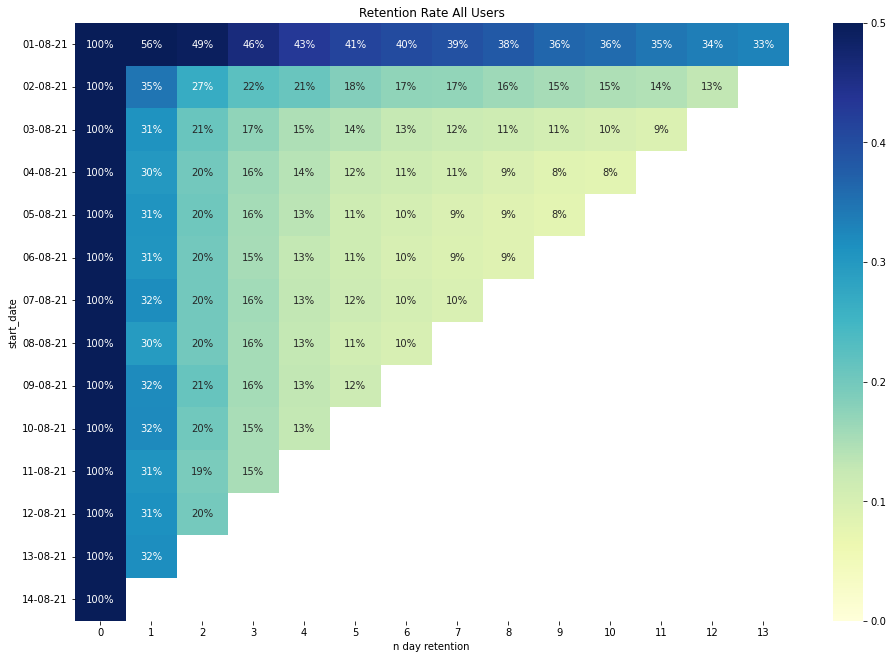

In [28]:
plt.figure(figsize = (16,11))
plt.title('Retention Rate All Users')
sns.heatmap(data = retention_rate_all_users, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")

Retention Rate выглядит довольно "здоровым", особенно показатели первой когорты, хотя явно прослеживается тенденция ухудшения. (т.к я не знаю жанр игры и другие показатели, я определял состояние проекта основываясь на данных из [таблицы средних показателей игр по жанрам](https://hsbi.hse.ru/programs/vocational_retraining/menedzhment-igrovykh-internet-proektov/w-average-game-pbg/), далее все выводы я буду делать, опираясь на данную таблицу.

    Теперь посмотрим на новых и старых пользователей по отдельности и сравнить их показатели

<AxesSubplot:title={'center':'Retention Rate New Users'}, xlabel='cohort_index', ylabel='reg_date'>

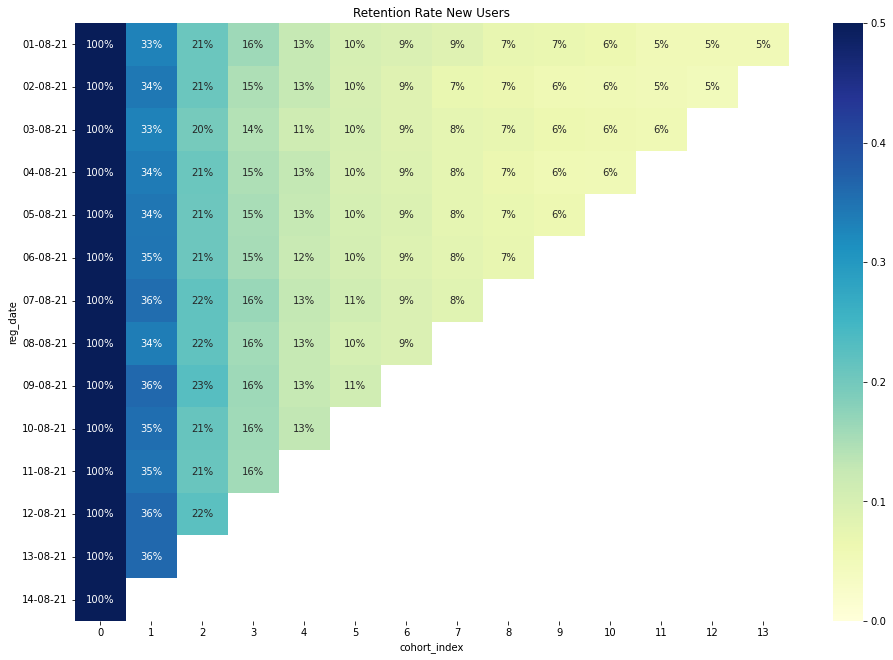

In [29]:
plt.figure(figsize = (16,11))
plt.title('Retention Rate New Users')
sns.heatmap(data = new_users_retention_rate, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")

<AxesSubplot:title={'center':'Retention Rate Old Users'}, xlabel='n day retention', ylabel='start_date'>

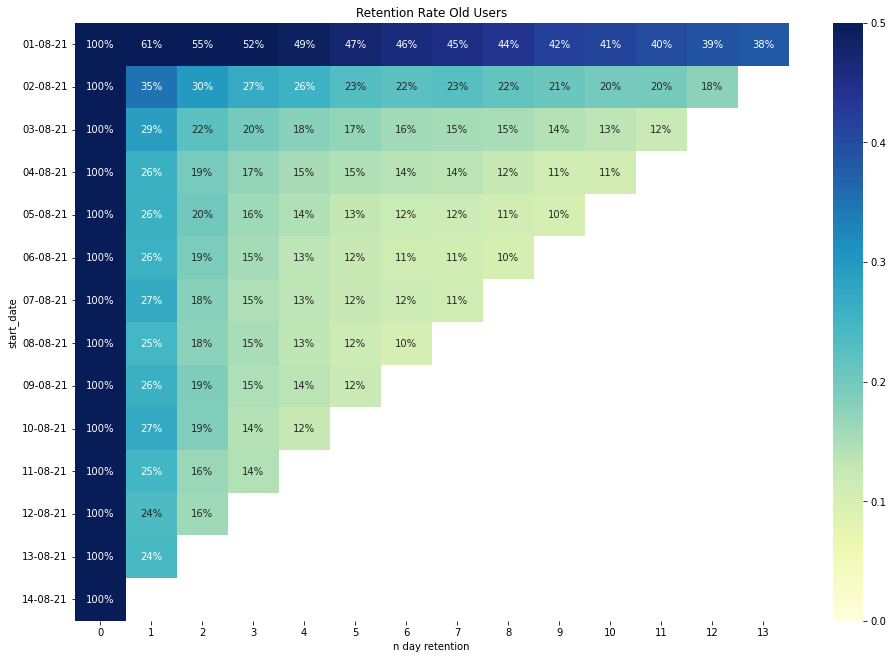

In [30]:
plt.figure(figsize = (16,11))
plt.title('Retention Rate Old Users')
sns.heatmap(data = old_users_retention_rate, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")

    Мы видим, что новые пользователи имеют довольно низкий Retention rate, а "старые" пользователи - высокий. Из-за этого    при рассмотрении всех пользователей вместе возникает иллюзия, что Retention Rate является "здоровым показателем".
## Выводы:
    - Нужно что-то менять для увеличения Retention'a новых пользователей. Сейчас их покупка будет неэффективной, т.к. только малая часть остается в игре надолго
    - Показатель конверсии в первую покупку выше, чем в среднем на рынке.
    - Маленький средний чек.
    
    Я считаю, что игру нужно еще немного доработать. 

# Задание 2

In [1]:
import math
n = 116
1 - math.factorial(365)/(365**n * math.factorial(365-n))

0.9999999988462107